In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/stock_data.csv")

# Display first rows
df.head()


,Date,Open,High,Low,Close
0,2000-01-03,174.908024,183.827255,165.366012,174.457374
1,2000-01-04,290.142861,295.692548,280.155305,292.620514
2,2000-01-05,246.398788,251.968609,243.280123,244.214794
3,2000-01-06,219.731697,221.977041,212.188878,214.930496
4,2000-01-07,131.203728,141.048384,126.801449,131.615934


In [3]:
# Check missing values
df.isnull().sum()

# Drop missing values (or use fillna if needed)
df.dropna(inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)


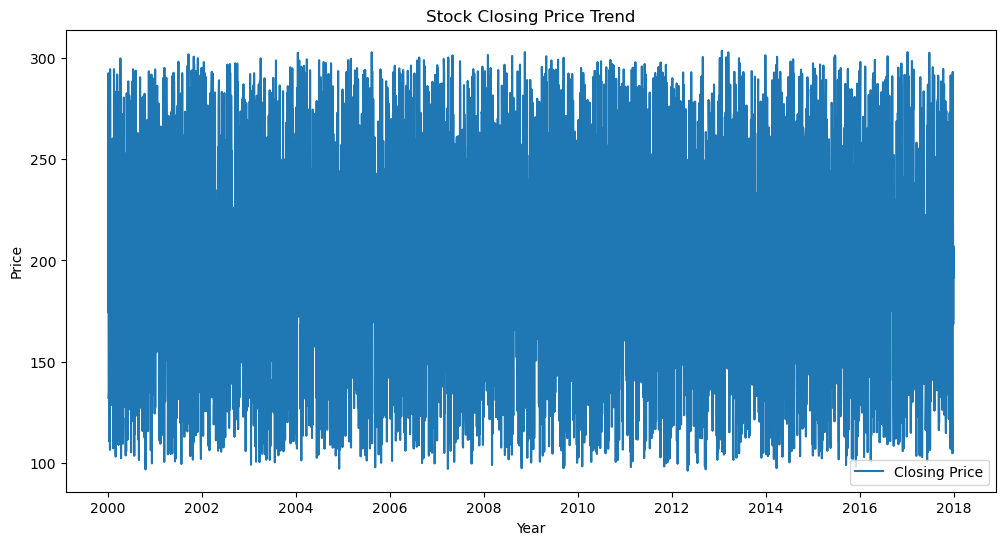

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Stock Closing Price Trend')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


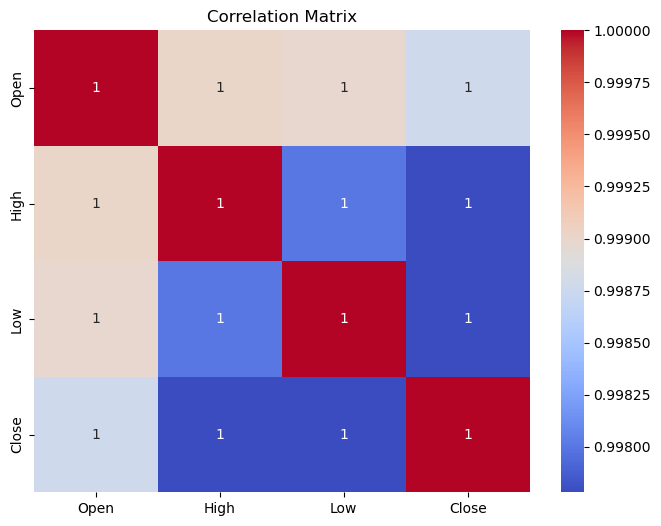

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
# Select features and target
X = df[['Open', 'High', 'Low']]
y = df['Close']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.9971691714640073
Mean Squared Error: 9.520745058229018


In [14]:
import joblib

joblib.dump(model, "../model/random_forest_model.pkl")
print("Model saved successfully!")


Model saved successfully!
